# Flight Data Analysis ✈🛩🛩

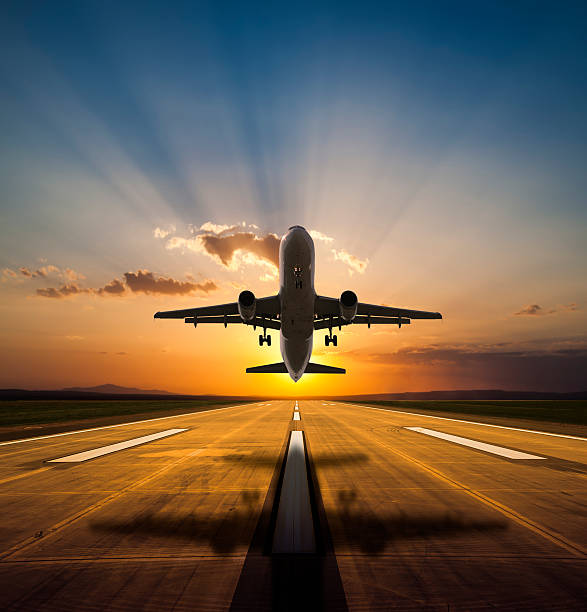

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to 
passengers.


Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities.

Time Frame - February 11th to March 31st, 2022.

**FEATURES**
The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.


**Steps of my work**
<ol>
 <li>Importing Libraries</li>
<li> Importing dataset</li>
<li> Cleaning, Exploring, Visualizing & Playing with the data.</li>
 <li>Exploratory Data Analysis(EDA)</li></ol>
 
  #### Analysis part
   <ul>
    <li> What are the airlines in the dataset, accompanied by thier frequencies?</li>
     <li> Departure time against Arrival time.</li>
     <li> Source city against Destination city.</li>
     <li> Does price vary with Airlines?</li>
     <li> How is the price affected when tickets are bought in just 1 or 2 days before departure?</li>
     <li> Does the price change with the duration of the flight?</li>
     <li> Does ticket price change based on the departure time and arrival time?</li>
    <li> How does the ticket price vary between Economy and Business class?</li>
     <li> How the price changes with change in Source and Destination?</li>
     <li> Does the number of stops influences the price?</li>
     </ul>

In [2]:
# Importing all needed libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib 
import matplotlib.dates as mdates
from scipy.stats import pearsonr
import random
import warnings
%matplotlib inline
# custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# sns.set_theme(style="ticks", rc=custom_params)

plt.style.use("fivethirtyeight")

print("All Modules & Settings Initialized 🚀")

All Modules & Settings Initialized 🚀


In [3]:
# Import the data
from urllib.request import urlretrieve 
flight_data = pd.read_csv('flights_data.csv')
print("Data Imported Successfully 🚀")

Data Imported Successfully 🚀


# Cleaning, Exploring, Visualizing & Playing with the data.

I first did a bit of cleaning here and there. Deleting and adding etc.

Then, did a bit of exploration and got to know my data.


Finally, I visualised to get some insights from the data provided.

Check it all out from below! 

Enjoy your code read 👍🏻

In [54]:
f'{flight_data.shape[1]} columns and {flight_data.shape[0]} rows.'

'12 columns and 300153 rows.'

In [55]:
headers = list(flight_data.columns)

In [56]:
flight_data.describe(include='all')

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,NaN,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,NaN,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,NaN,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,86646.852011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,75038.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,225114.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [57]:
# First 5 rows of data
flight_data.head(5)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [58]:
# Last 5 rows of data
flight_data.tail(5)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [59]:
# Duplicate data
flight_data.loc[flight_data.duplicated()]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


No duplicate data in the dataset.

In [60]:
# Null values
flight_data.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [36]:
# Remove IN-DATA `index` column
flight_data.drop(columns=['index'], axis=1, inplace=True)

print("Successfully removed `index` column from dataset 🚀")

Successfully removed `index` column from dataset 🚀


In [61]:
#Information after modification
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [13]:
model_df = flight_data.copy()
model_df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [62]:
# Get some description about the data
flight_data.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [63]:
for column in flight_data.columns:
    if column != 'duration' and column != 'price' and column != 'days_left' and column != 'Unnamed: 0' and column != 'flight':
        print(f"{column}: \n{flight_data[column].unique()}\n\n")

index: 
[     0      1      2 ... 300150 300151 300152]


airline: 
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


source_city: 
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']


departure_time: 
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']


stops: 
['zero' 'one' 'two_or_more']


arrival_time: 
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']


destination_city: 
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']


class: 
['Economy' 'Business']




**Exploratory Data Analysis(EDA)**

In [68]:
# Group the data and calculate the desired statistics
flight_data = flight_data.groupby('airline')['price'].agg(['mean', 'median', 'std']).round(2)

# Create a new DataFrame with the desired columns
table = pd.DataFrame({'Mean Price': flight_data['mean'],
                      'Median Price': flight_data['median'],
                      'Standard Deviation': flight_data['std']})

# Display the table
print(table)

           Mean Price  Median Price  Standard Deviation
airline                                                
AirAsia       4091.07        3276.0             2824.06
Air_India    23507.02       11520.0            20905.12
GO_FIRST      5652.01        5336.0             2513.87
Indigo        5324.22        4453.0             3268.89
SpiceJet      6179.28        5654.0             2999.63
Vistara      30396.54       15543.0            25637.16


<Axes: xlabel='price'>

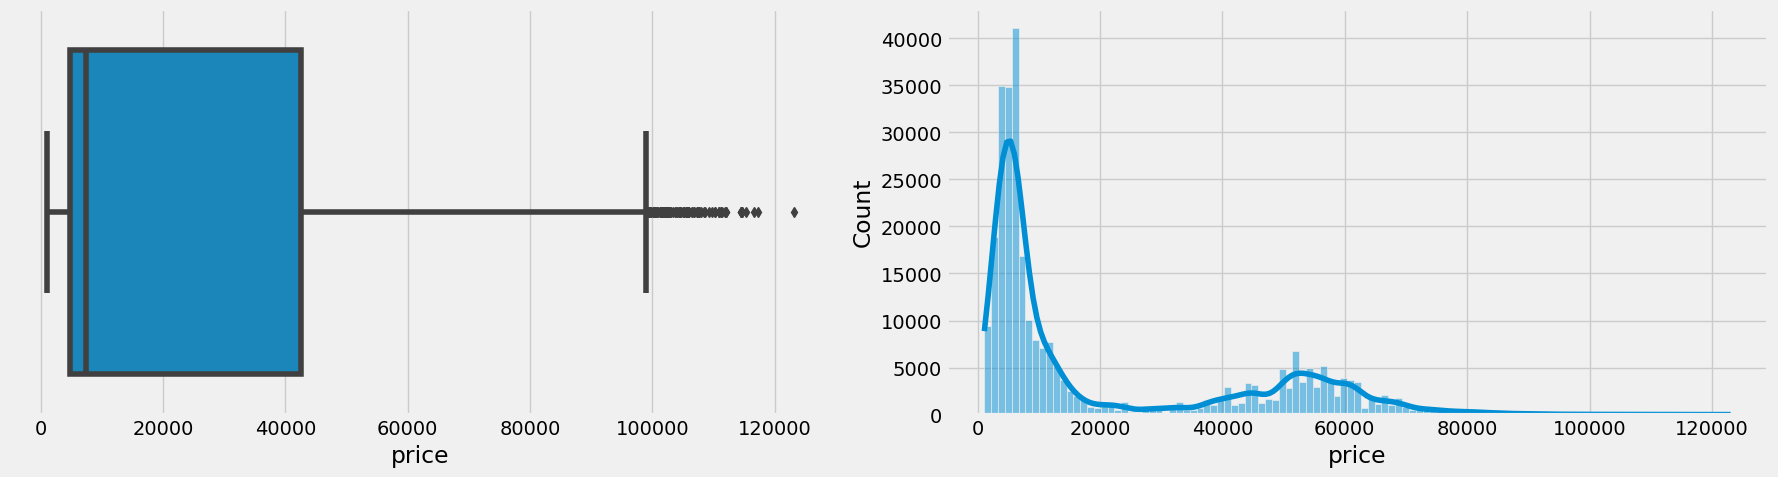

In [64]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = flight_data, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = flight_data)

Even though the mean is around 20000, we can see here that the median is approximately 7500. This difference is explainable by the presence of two different tickets: business and economy. On the second graph, we can see that the dispersion seems to be composed by two gaussian curves.

**What are the airlines in the dataset, accompanied by thier frequencies?**

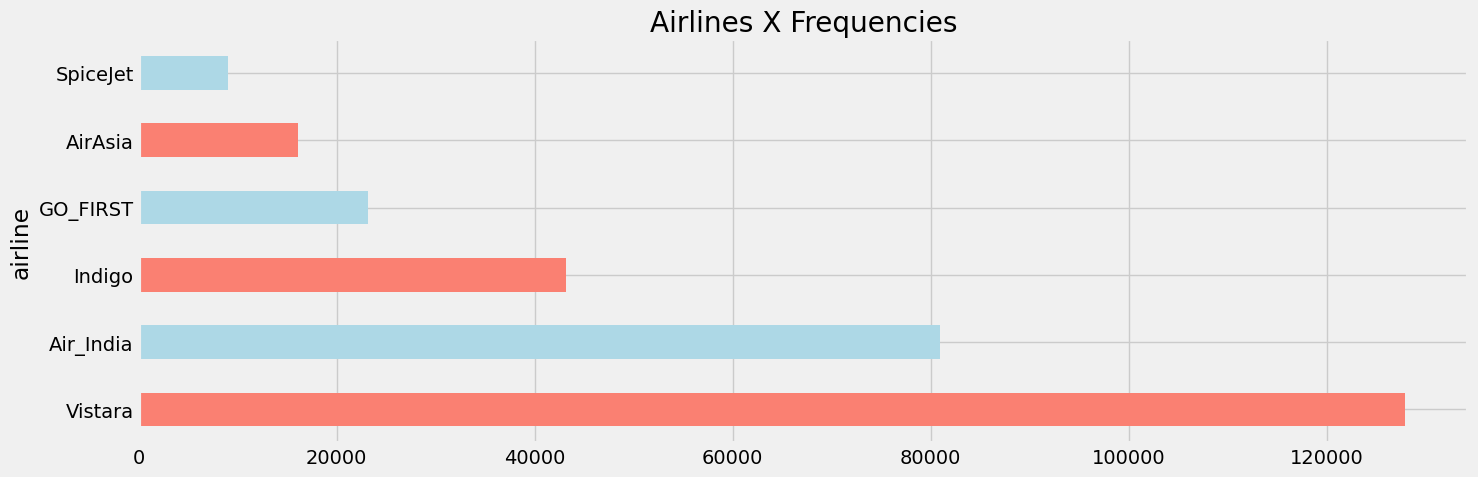

In [65]:
plt.title("Airlines X Frequencies")
plt.xlabel("Number of Flights")
plt.ylabel("Airlines")
flight_data["airline"].value_counts().plot.barh(color=["salmon", "lightblue"])

plt.show()

Vistara, Air India and Indigo are the airlines that appear the most in the dataset.

**Departure time against Arrival time.**

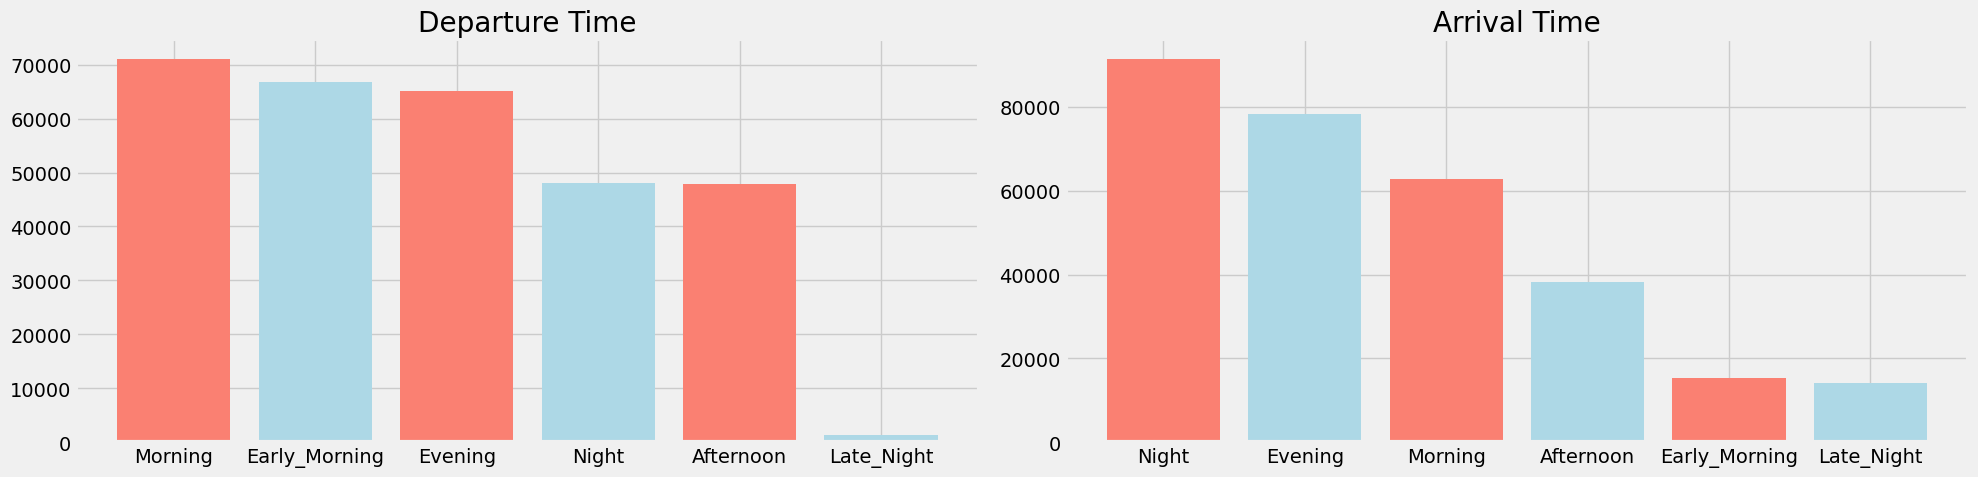

In [66]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True

plt.subplot(1, 2, 1)
plt.bar(flight_data["departure_time"].value_counts().index, flight_data["departure_time"].value_counts(), color=["salmon", "lightblue"])
plt.title("Departure Time")


plt.subplot(1, 2, 2)
plt.bar(flight_data["arrival_time"].value_counts().index, flight_data["arrival_time"].value_counts(),color=["salmon", "lightblue"])
plt.title("Arrival Time")

plt.show()



**Source city against Destination city.**

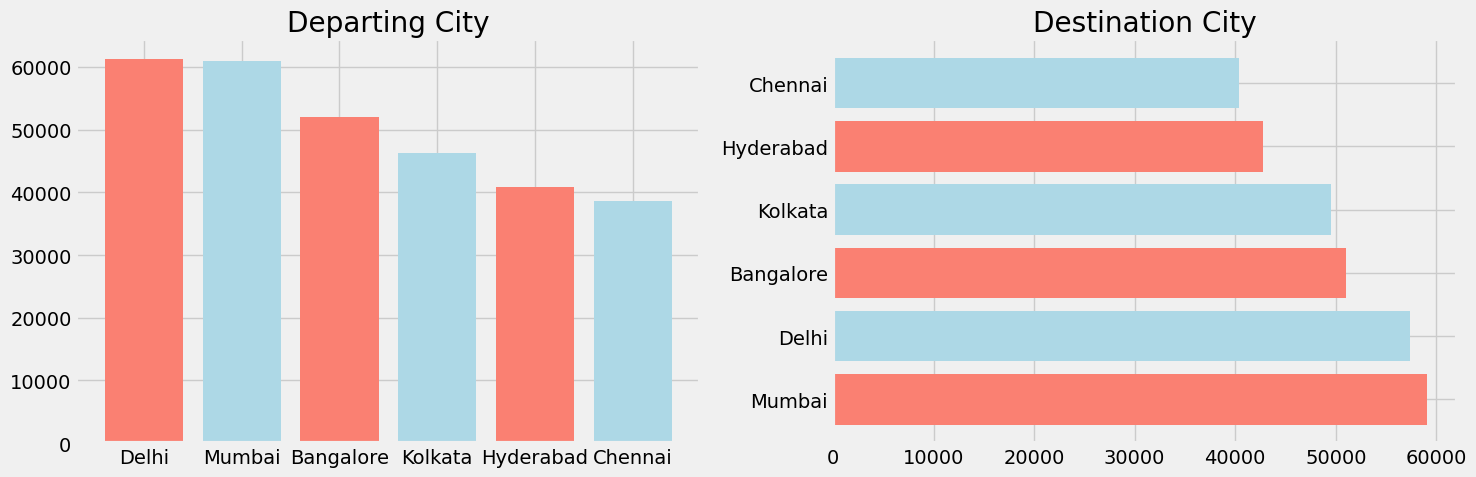

In [67]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True


plt.subplot(1, 2, 1)
plt.bar(flight_data["source_city"].value_counts().index, flight_data["source_city"].value_counts(), color=["salmon", "lightblue"])
plt.title("Departing City")

plt.subplot(1, 2, 2)
plt.barh(flight_data["destination_city"].value_counts().index, flight_data["destination_city"].value_counts(),color=["salmon", "lightblue"])
plt.title("Destination City")



plt.show()

#### **Does price vary with Airlines?**

To visualize the difference between the two kind of tickets, I will plot the prices for the two prices for both business and economy tickets for the different companies.

Text(0.5, 1.0, 'Airline prices based on the class and company')

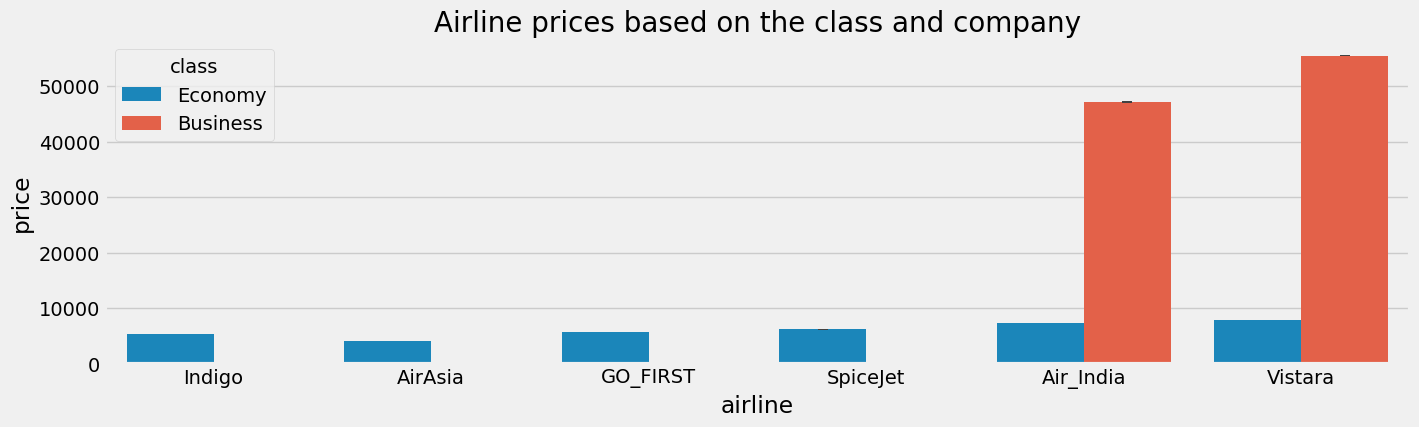

In [6]:
plt.figure(figsize=(15, 4))
sns.barplot(x='airline',y='price',hue="class",data=flight_data.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

 Business flights are only available in two companies: Air India and Vistara. Also, there is a big gap between the prices in the two class that reaches almost 5 times the price of Economy for Business tickets.

To compare the prices between the companies we will only compare the same kind of tickets since the previous question showed that the class has a big impact on the final price.

Text(0.5, 1.0, 'Airline prices based on companies for business tickets')

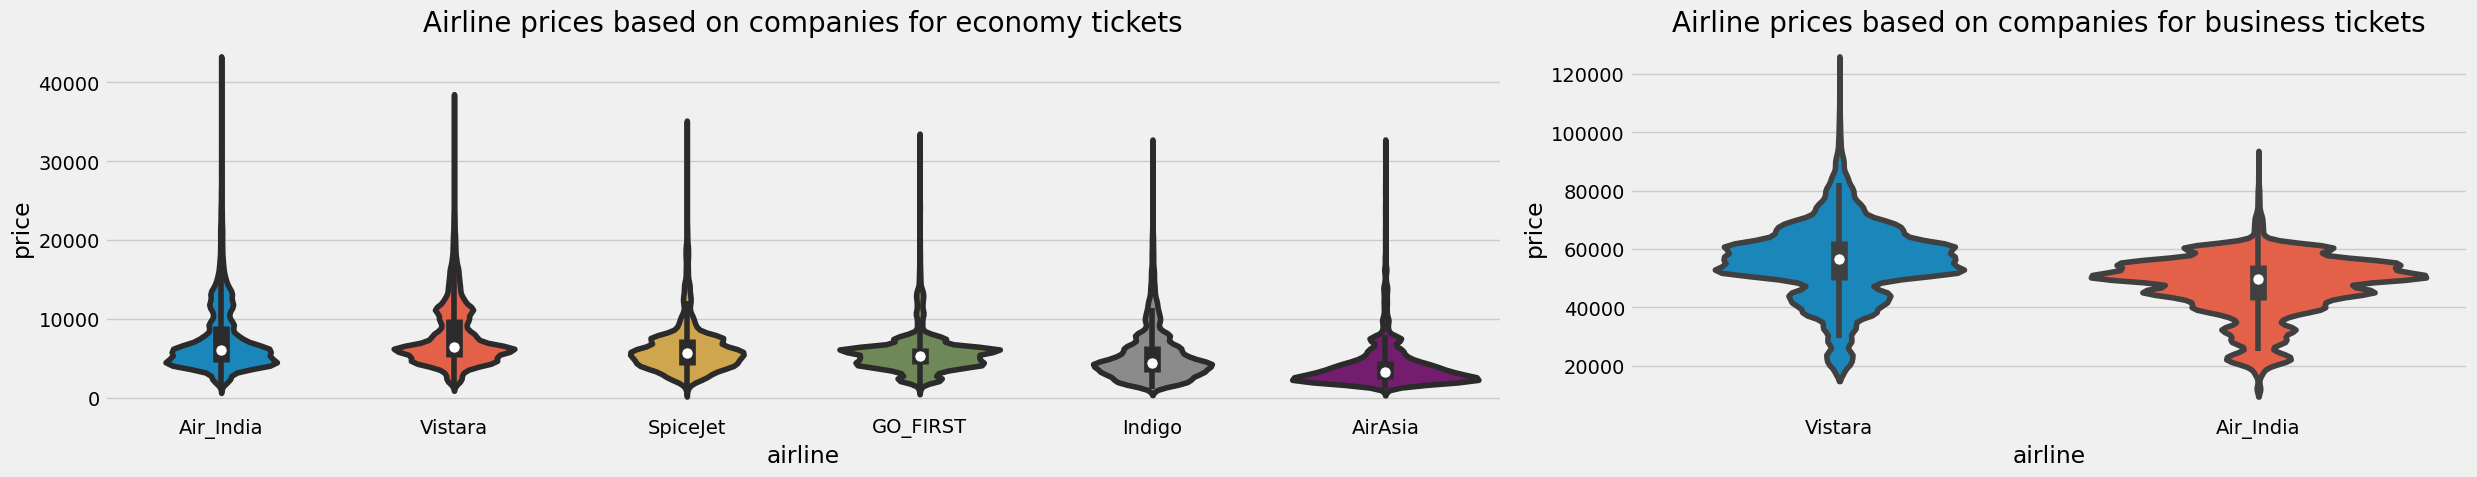

In [91]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.violinplot(y = "price", x = "airline",data = flight_data.loc[flight_data["class"]=='Economy'].sort_values("price", ascending = False), kind="boxen", ax=axs[0])
axs[0].set_title("Airline prices based on companies for economy tickets",fontsize=20)
sns.violinplot(y = "price", x = "airline",data = flight_data.loc[flight_data["class"]=='Business'].sort_values("price", ascending = False), kind="boxen", ax=axs[1])
axs[1].set_title("Airline prices based on companies for business tickets",fontsize=20)

There are slight differences between each companies on this graph, AirAsia seems to have the cheapest flights when Air India and Vistara are more expensive. However it looks like Vistara's business tickets are a little more expensive than the Air India's ones.

**How is the price affected when tickets are bought in just 1 or 2 days before departure?**


To visualize how the prices changes depending on the number of days left, I will calculate the average price depending on the days left, to try to understand a pattern in the curve.

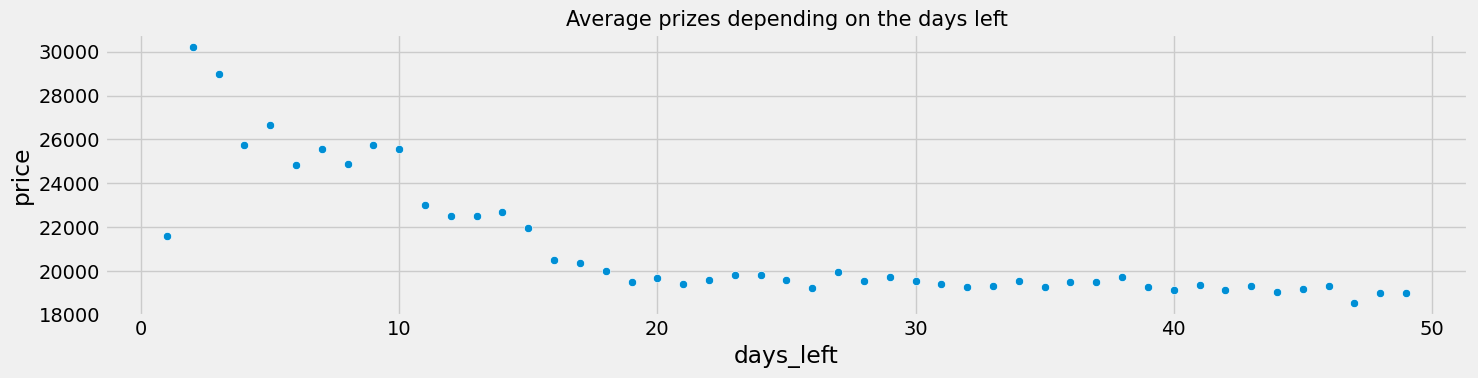

In [92]:
df_temp = flight_data.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,4))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Average prizes depending on the days left",fontsize=15)

It is possible to see two different curves on this graph, the first one, stable between 50 and 20 days before the flight, and a positive monotone curve between 20 and 2 days before

<Axes: xlabel='days_left', ylabel='price'>

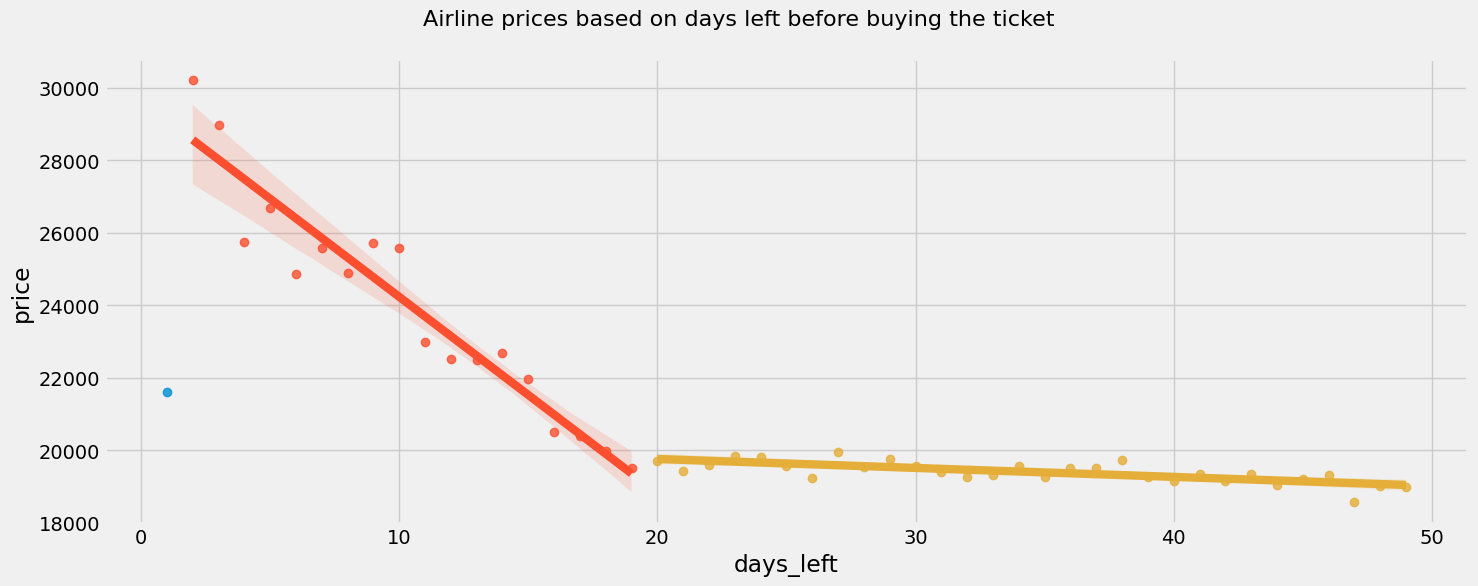

In [82]:
plt.figure(figsize=(15,6)).suptitle('Airline prices based on days left before buying the ticket', fontsize=16)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["days_left"]==1].days_left, y=df_temp.loc[df_temp["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].days_left, y=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["days_left"]>=20].days_left, y=df_temp.loc[df_temp["days_left"]>=20].price, fit_reg=True, ax=ax)

A pattern is clearly visible in the way prices evolve depending on the days left.

The graph highlights how the prices rise slowly and then drastically start rising 20 days before the flight, but fall just one day before the flight up to three times cheaper. This can be explain by the fact the companies want to fill their empty seats and thus lower the prices of the tickets to ensure the planes remains full.

**Does the price change with the duration of the flight?**


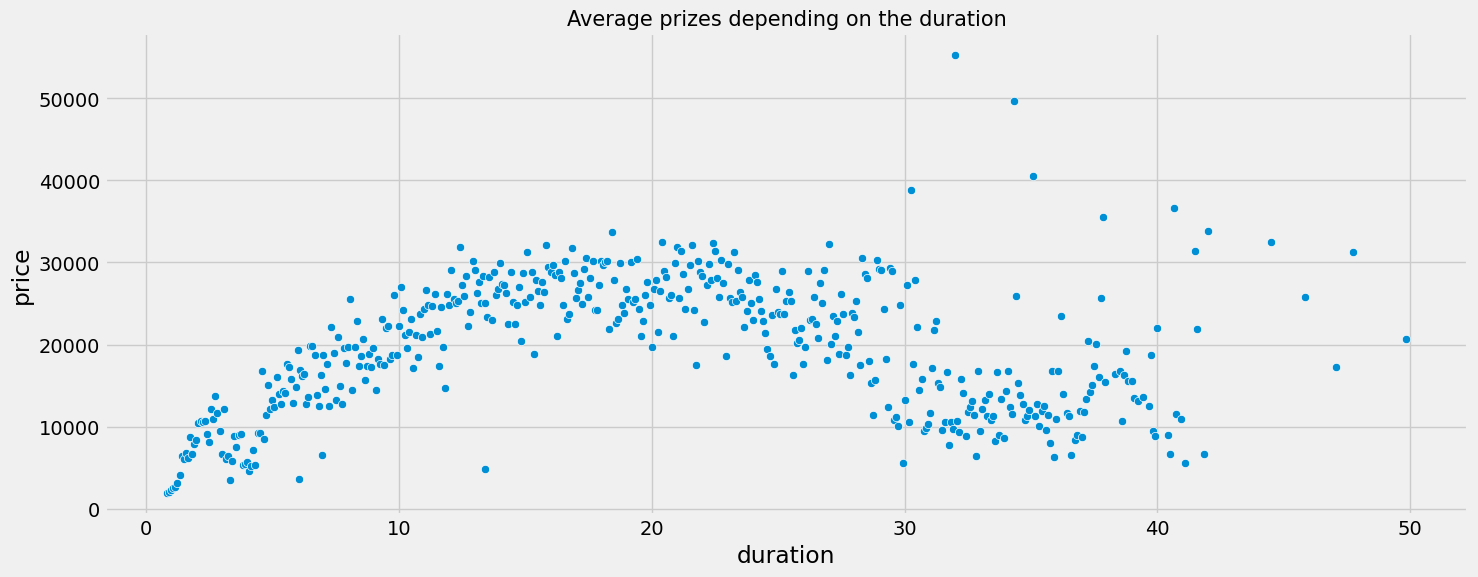

In [83]:
df_temp = flight_data.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average prizes depending on the duration",fontsize=15)


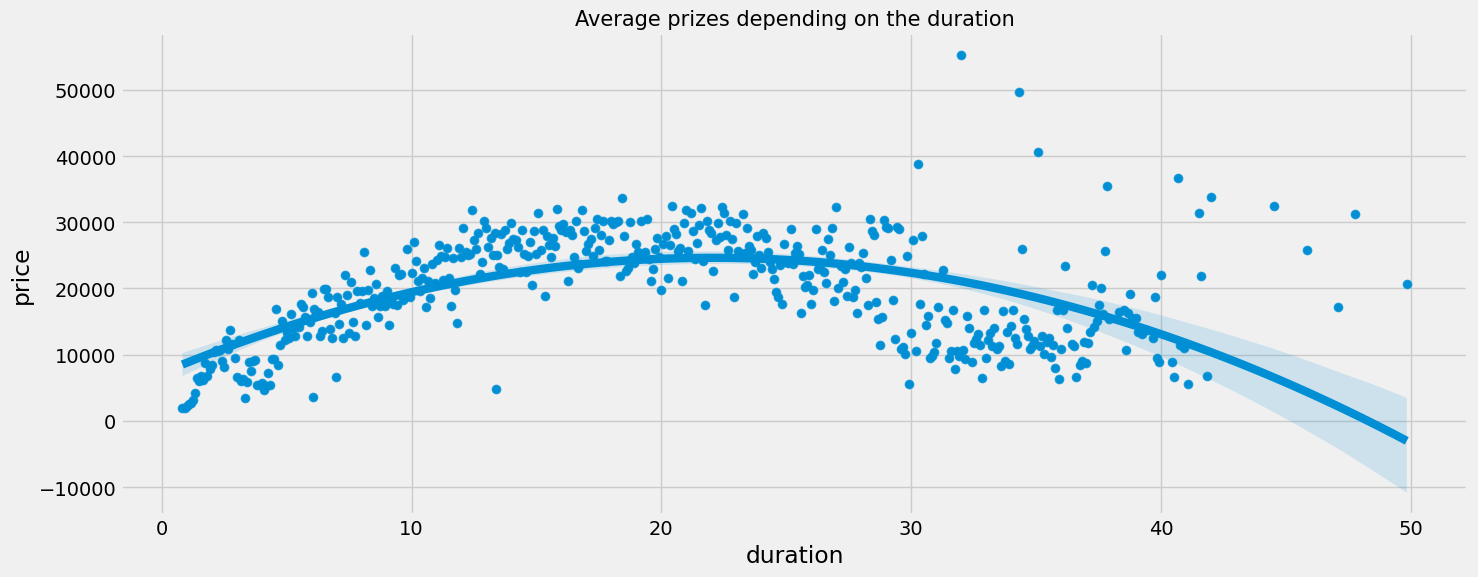

In [84]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average prizes depending on the duration",fontsize=15)
ax = sns.regplot(x="duration", y="price", data=df_temp, order=2)

It is clear that here the relationship is not linear but can be approximated with a second degree curve. The prices reaches a high price at a duration of 20 hours before lowering again.

However some outliers seem to affect the regression curve .

**Does ticket price change based on the departure time and arrival time?**

Text(0.5, 1.0, 'Airline prices based on the arrival time')

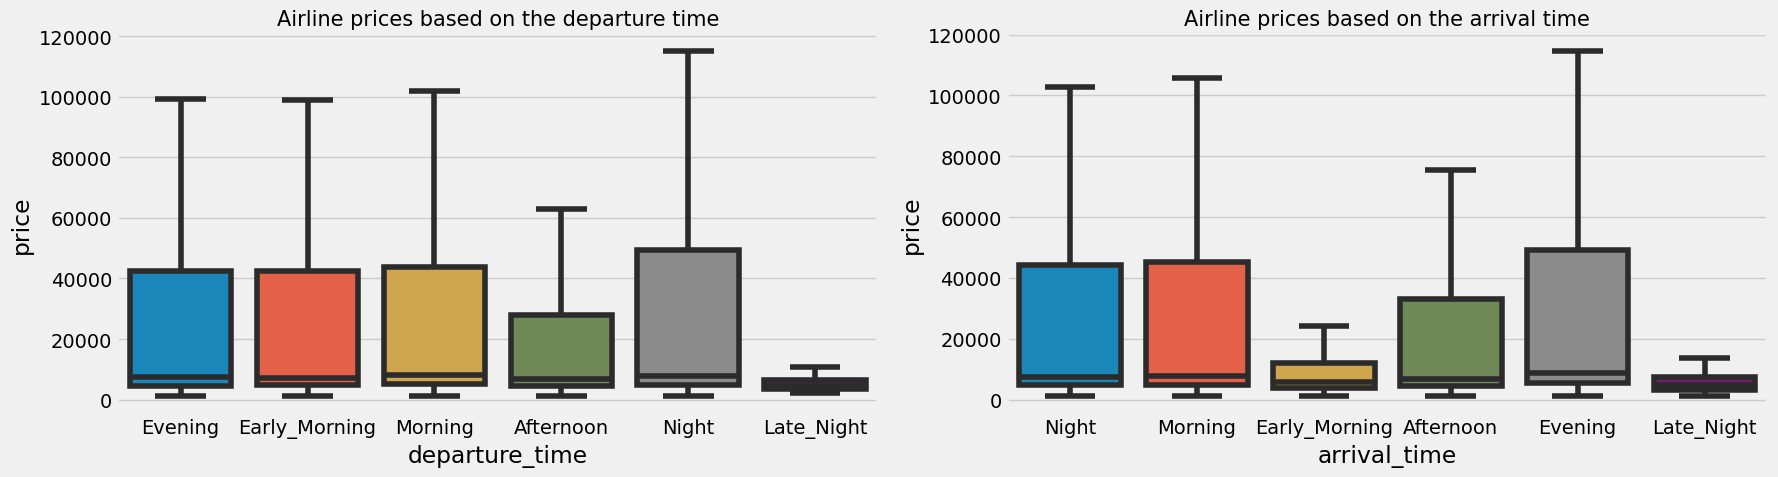

In [85]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=flight_data, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=flight_data, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)

As expected, leaving at night or arriving at night remains the cheapest way to travel. But it's also visible that arriving early morning is also cheap and afternoon flight are a bit cheaper that evening, morning and night flight.

**How does the ticket price vary between Economy and Business class?**

In [10]:
class_df = flight_data.groupby('class').apply(lambda df: df.price.mean())
class_df = class_df.to_frame().reset_index()
class_df.dtypes

class     object
0        float64
dtype: object

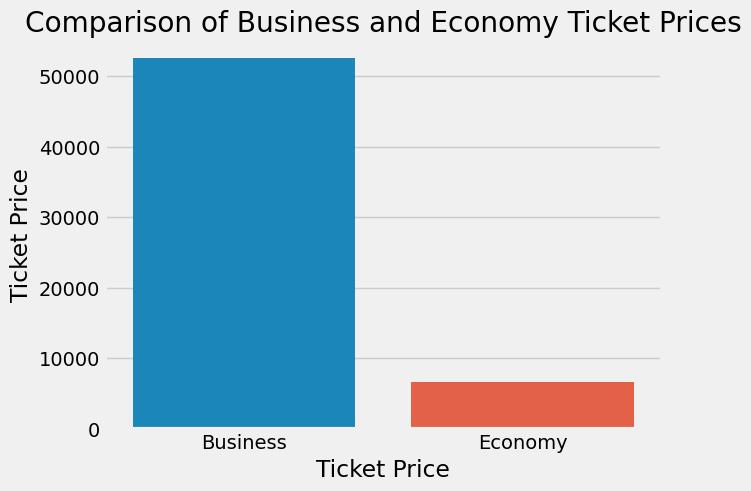

In [11]:
sns.barplot(data=class_df, x='class', y=0)
plt.xlabel('Ticket Price')
plt.title('Comparison of Business and Economy Ticket Prices')
plt.ylabel("Ticket Price")
plt.show()

It is a well-known fact that Business Class tickets are generally more expensive than Economy Class tickets. This is due to the additional amenities and perks that come with Business Class, such as more legroom, better food, and priority boarding.

However, it is interesting to note that there are certain exceptions to this general rule. For instance, the most expensive Economy Class ticket from Chennai to Kolkata is priced at a whopping 42349Rs, which is higher than some Business Class tickets for other routes.

On the other hand, the cheapest Business Class ticket for the route from Bangalore to Hyderabad is only priced at 12000Rs, which is significantly lower than the average Business Class ticket price. This phenomenon can be attributed to logistical and market factors, such as competition among airlines and demand for certain routes.

Another Fun Fact: Air India appears to offer both the most expensive economy class ticket and the least expensive business class ticket.It's not uncommon for airlines to have some variability in their pricing, and it's possible that Air India's pricing strategy includes offering both high-priced economy tickets and low-priced business tickets. There could be several reasons for this pricing strategy. For example, Air India may be trying to attract more customers to its business class seats by offering them at a lower price point. At the same time, the airline may be looking to maximize revenue by charging a premium for its most expensive economy tickets. It's also possible that these pricing variations are a result of supply and demand factors, such as the availability of seats on particular flights or the popularity of certain routes. Overall, it's difficult to say for certain why Air India is offering both high-priced economy tickets and low-priced business tickets without more information about their pricing strategy and market factors.

Overall, while the price difference between Business and Economy Class tickets may be a general trend, there can be notable exceptions that are worth exploring and understanding in the context of the airline industry.

**How the price changes with change in Source and Destination?**


 I will visualize the different prices for all the destinations as a departure and arrival destination.

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

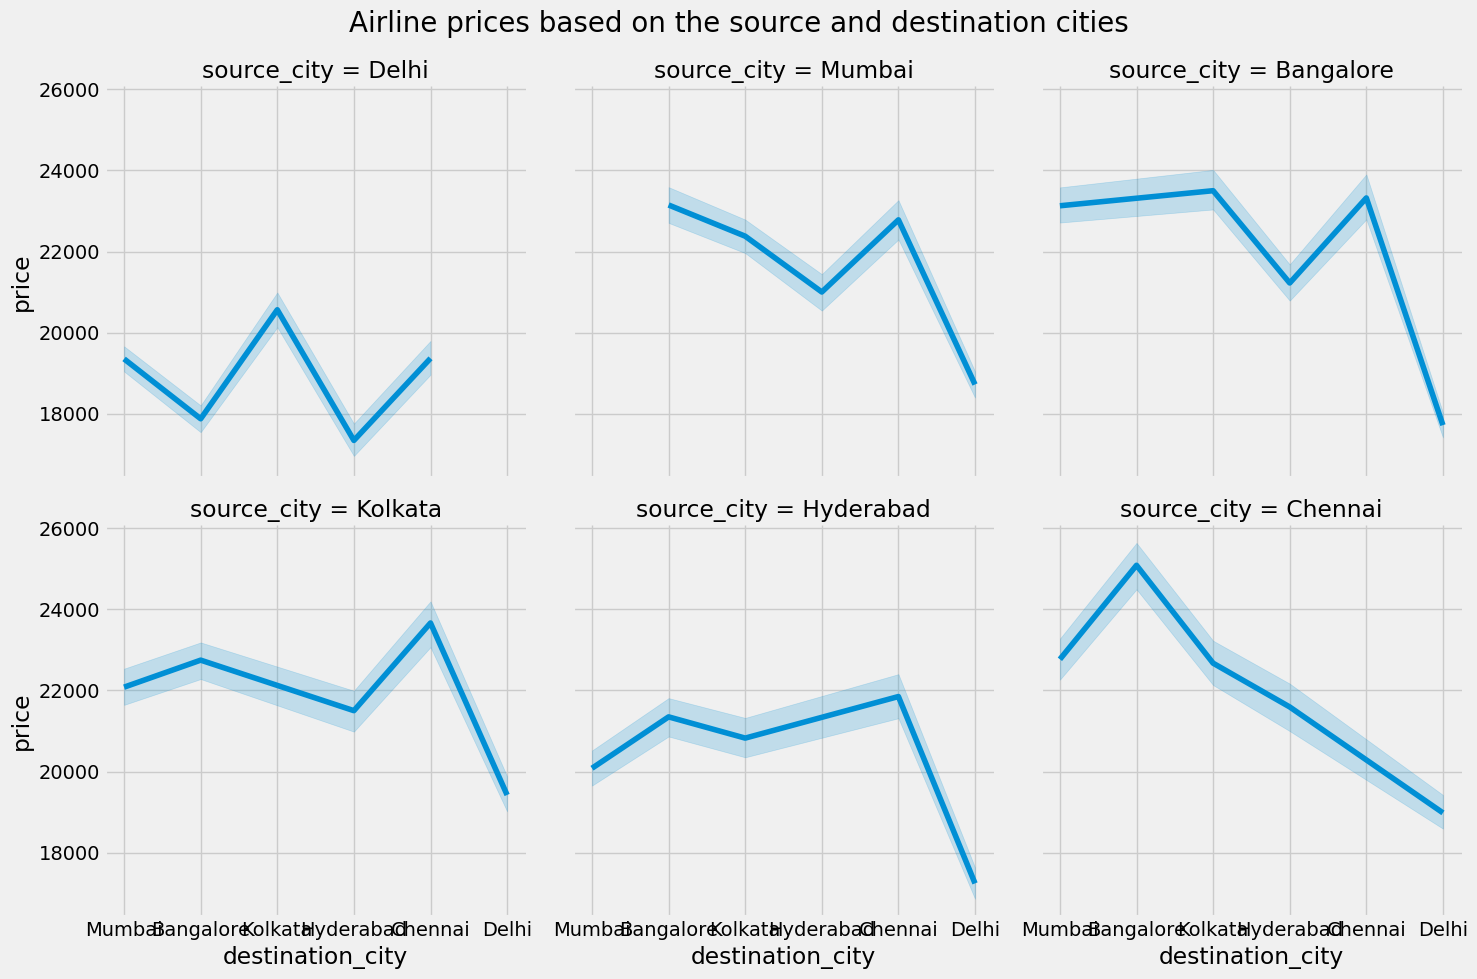

In [86]:
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=flight_data, col_wrap=3)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ax.fig.suptitle('Airline prices based on the source and destination cities',fontsize=20)

On one hand, it seems that flight leaving from Delhi are often cheaper that from other source cities and the capital is also the cheapest deatination to go probably because as a capital cities, the airport is the biggest and proposes more flights. In an other hand, the prices are more or less similar and Hyderabad being the most expensive destination.

**Does the number of stops influences the price?**

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

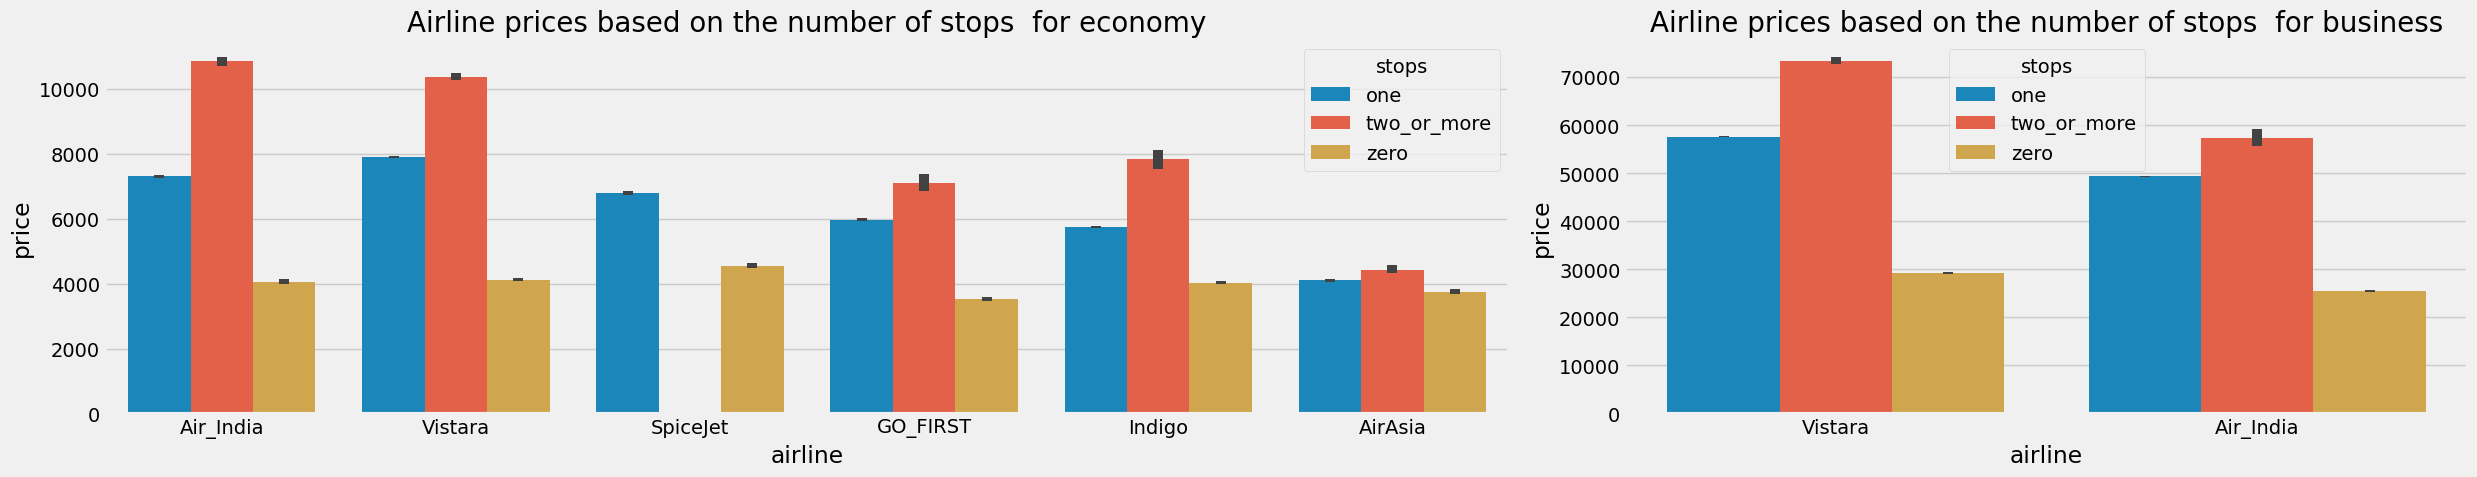

In [87]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = flight_data.loc[flight_data["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = flight_data.loc[flight_data["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

It's clear that the more stops there are the more expensive the flight is except for AirAsia where the prices seems more constant. The behaviour and different analysis of AirAsia tend to show that it relates to a low cost company.